In [3]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import os
# Verify the current working directory
print(os.getcwd())

# Change to a specific directory
os.chdir("/Users/shivam_kansliwal/Documents/Car_Price_Prediction")

C:\Users\shivam_kansliwal\Documents\Car_Price_Prediction


In [5]:
#import the dataset
df=pd.read_csv('Car details.csv')


In [6]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
#looking describe dataset
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
#make dtypes of some variable 'category'
categoric_columns= ['fuel','transmission','owner','seller_type']
for column in categoric_columns:
    df[column]=df[column].astype('category')

In [10]:
#create 'car_brand_name' feature from 'name' feature

df['car_brand_name']=df['name'].str.extract('([^\s]+)')
df['car_brand_name']=df['car_brand_name'].astype('category')

In [11]:
#extract value of engine and mileage variable
df['engine']=df['engine'].str.extract('([^\s]+)').astype(float)
df['mileage']=df['mileage'].str.extract('([^\s]+)').astype(float)

In [12]:
#extract value of 'max_power' variable
df['max_power']=df['max_power'].str.extract('([^\s]+)')
df['max_power']=df['max_power'][~(df['max_power'] == 'bhp')]
df['max_power']=df['max_power'].astype(float)

In [13]:
#create 'car_age' feature from 'year' column
import datetime
df['car_age']=(datetime.datetime.now().year)-(df['year'])

In [14]:
#drop the features of 'name','year' and 'torque'
df.drop(columns=['name','year','torque'],axis=1,inplace=True)

In [15]:
df

selling_price  km_driven    fuel       seller_type transmission  \
0            450000     145500  Diesel        Individual       Manual   
1            370000     120000  Diesel        Individual       Manual   
2            158000     140000  Petrol        Individual       Manual   
3            225000     127000  Diesel        Individual       Manual   
4            130000     120000  Petrol        Individual       Manual   
5            440000      45000  Petrol        Individual       Manual   
6             96000     175000     LPG        Individual       Manual   
7             45000       5000  Petrol        Individual       Manual   
8            350000      90000  Diesel        Individual       Manual   
9            200000     169000  Diesel        Individual       Manual   
10           500000      68000  Diesel        Individual       Manual   
11            92000     100000  Petrol        Individual       Manual   
12           280000     140000  Diesel        Individual       Manual   
13           200000      80000  Petrol        Individual       Manual   
14           180000      90000  Petrol        Individual       Manual   
15           400000      40000  Petrol        Individual       Manual   
16           778000      70000  Diesel        Individual       Manual   
17           500000      53000  Diesel        Individual       Manual   
18           150000      80000  Petrol        Individual       Manual   
19           680000     100000  Diesel        Individual       Manual   
20           174000     100000  Diesel        Individual       Manual   
21           950000      50000  Diesel        Individual       Manual   
22           525000      40000  Diesel        Individual       Manual   
23           600000      72000  Diesel        Individual       Manual   
24           500000      35000  Petrol        Individual       Manual   
25           575000      45000  Petrol        Individual       Manual   
26           275000      28000  Petrol        Individual       Manual   
27           300000      70000  Diesel        Individual       Manual   
28           220000     120000  Petrol        Individual       Manual   
29           254999      25000  Petrol        Individual       Manual   
30           670000      70000  Diesel        Individual       Manual   
31            70000      50000  Petrol        Individual       Manual   
32           150000      35000  Petrol        Individual       Manual   
33           730000       2388  Petrol        Individual       Manual   
34           650000      16200  Diesel        Individual       Manual   
35           330000      10000     CNG        Individual       Manual   
36           366000      15000  Petrol        Individual       Manual   
37          1149000       5000  Petrol        Individual       Manual   
38           150000      42000  Petrol        Individual       Manual   
39           425000      60000  Diesel        Individual       Manual   
40           150000      76000  Petrol        Individual       Manual   
41          2100000       5000  Petrol        Individual    Automatic   
42           925000      28900  Petrol            Dealer       Manual   
43           425000      86300  Petrol            Dealer       Manual   
44           675000      23300  Petrol            Dealer    Automatic   
45           819999      32600  Diesel            Dealer       Manual   
46           390000      10300  Petrol            Dealer       Manual   
47          1500000      77000  Diesel            Dealer       Manual   
48           700000      99000  Diesel            Dealer       Manual   
49          1450000      27800  Diesel            Dealer    Automatic   
50           425000      49800  Diesel            Dealer       Manual   
51          1090000     151000  Diesel            Dealer       Manual   
52           600000      54700  Diesel            Dealer       Manual   
53           850000      64000  Petrol            Dealer       M

In [16]:
#describe price value
df['selling_price'].describe().round(2)

count        8128.00
mean       638271.81
std        806253.40
min         29999.00
25%        254999.00
50%        450000.00
75%        675000.00
max      10000000.00
Name: selling_price, dtype: float64

In [17]:
df['km_driven'].value_counts().nlargest()

120000    536
70000     456
80000     448
60000     425
50000     391
Name: km_driven, dtype: int64

In [18]:
df.describe().T.style

#description of numeric variable
1. minimum selling price is 29999 USD and maximum price is 10000000 USD and average selling price is 638271 USD.
2. The driving distance of the least driven car is 1 km, the most driven car's driving distance is 2360457 km, and average
    driving distance is 69819.
3. The no. of seats of cars change from 2 seats to 14 seats
4. Minimum mileage is 0, maximum mileage is 42, average mileage is 19.4
5. Engine volume changes from 624 to 3604, average is 1458.

In [19]:
df.describe(include='category').T

count unique          top  freq
fuel            8128      4       Diesel  4402
seller_type     8128      3   Individual  6766
transmission    8128      2       Manual  7078
owner           8128      5  First Owner  5289
car_brand_name  8128     32       Maruti  2448

# About categoric variable

1. Fuel kind with highest frequency :- Diesel (frequency=4402)
2. seller type with highest frequency:- Individual(frequency=6766)
3. Transmission type with highest frequency:- Manual ( frequency= 7078)
4. owner type with highest frequency :- First Owner (frequency= 5289)
5. car brand name with highest frequency : Maruti (frequency= 2448) 
    

In [20]:
# checking missing value and fill them
df.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
seats             221
car_brand_name      0
car_age             0
dtype: int64

<Figure size 1000x500 with 0 Axes>

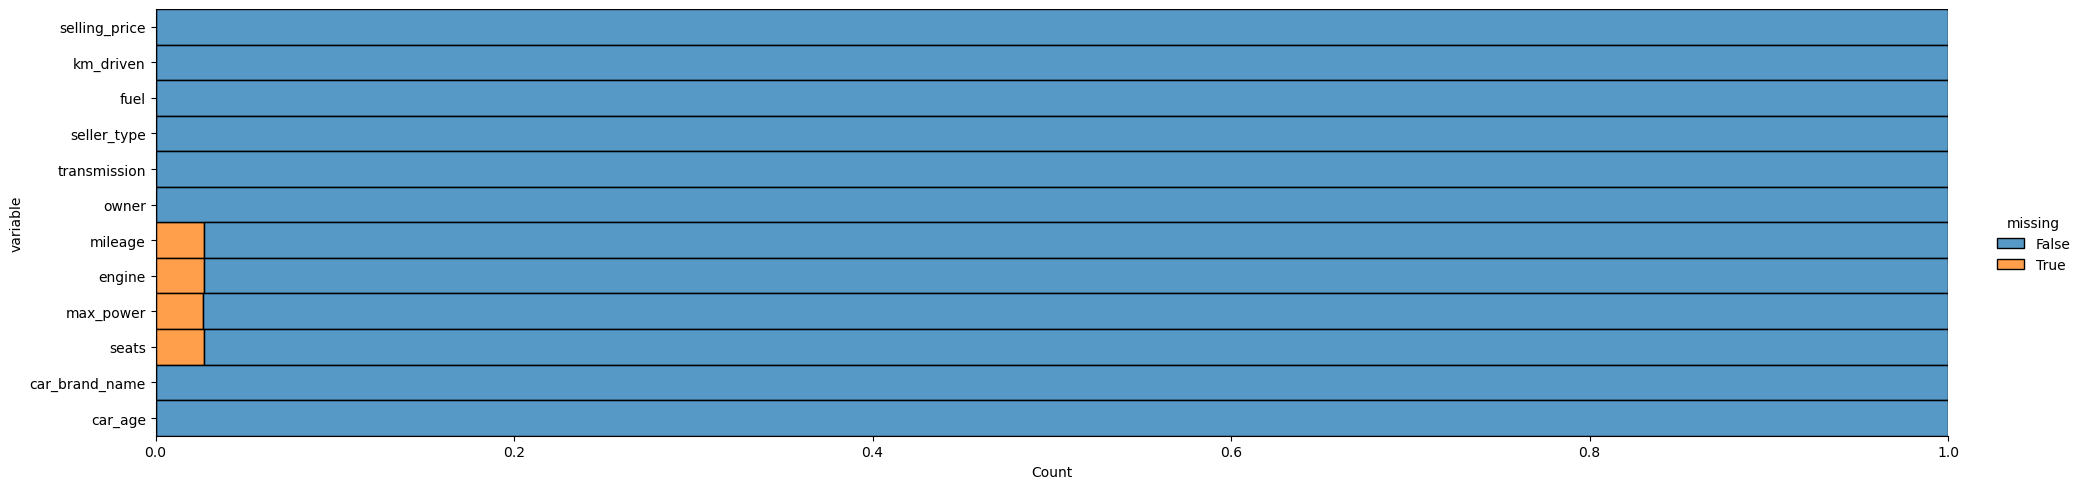

In [21]:
#visualize missing values with seaborn (distplot)

plt.figure(figsize= (10,5))
sns.displot(
    data= df.isna().melt(value_name='missing'),
    y= 'variable',
    hue='missing',
    multiple='fill',
    aspect=4
);    

In [22]:
# fill null values with median (numeric) and frequent values('categoric')


numeric_data=[column for column in df.select_dtypes(['int','float'])]
numeric_data

['selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'car_age']

In [23]:
categorical_data=[column for column in df.select_dtypes(exclude=['int','float'])]
categorical_data

['fuel', 'seller_type', 'transmission', 'owner', 'car_brand_name']

In [24]:
# fill numeric data with median

for col in numeric_data:
    df[col].fillna(df[col].median(),inplace=True)

In [25]:
#Replace missing values in each categorical column with the most frequent value

for col in categorical_data:
    df[col].fillna(df[col].mode(),inplace=True)

In [26]:
#check the null value again

df.isnull().sum()

selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
car_brand_name    0
car_age           0
dtype: int64

In [27]:
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0         450000     145500  Diesel  Individual       Manual   First Owner   
1         370000     120000  Diesel  Individual       Manual  Second Owner   
2         158000     140000  Petrol  Individual       Manual   Third Owner   
3         225000     127000  Diesel  Individual       Manual   First Owner   
4         130000     120000  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats car_brand_name  car_age  
0    23.40  1248.0      74.00    5.0         Maruti        9  
1    21.14  1498.0     103.52    5.0          Skoda        9  
2    17.70  1497.0      78.00    5.0          Honda       17  
3    23.00  1396.0      90.00    5.0        Hyundai       13  
4    16.10  1298.0      88.20    5.0         Maruti       16

In [28]:
# get frequency of some  variable

print("class frequency of 'fuel' variable: \n\n",df['fuel'].value_counts())

print("--------------------------------------------------------------------")

print(" class frequency of 'seller_type' variable: \n\n",df['seller_type'].value_counts())

print("----------------------------------------------------------------------")

print("class frequency of 'transmission' variable: \n\n",df['transmission'].value_counts())

print("-----------------------------------------------------------------------")

print("class frequency of 'owner' variable: \n\n",df['owner'].value_counts())

print("-----------------------------------------------------------------------")

print("class frequency of 'car_brand_name' variable: \n\n",df['car_brand_name'].value_counts())

print("-----------------------------------------------------------------------")




class frequency of 'fuel' variable: 

 Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
--------------------------------------------------------------------
 class frequency of 'seller_type' variable: 

 Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
----------------------------------------------------------------------
class frequency of 'transmission' variable: 

 Manual       7078
Automatic    1050
Name: transmission, dtype: int64
-----------------------------------------------------------------------
class frequency of 'owner' variable: 

 First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
-----------------------------------------------------------------------
class frequency of 'car_brand_name' variable: 

 Maruti           2448
Hyundai          1415
Mahindra          

In [29]:
# check correlation between the variable of dataset

df.corr().style.background_gradient(cmap='copper')

# lets do some visualization of using "Boxplot"

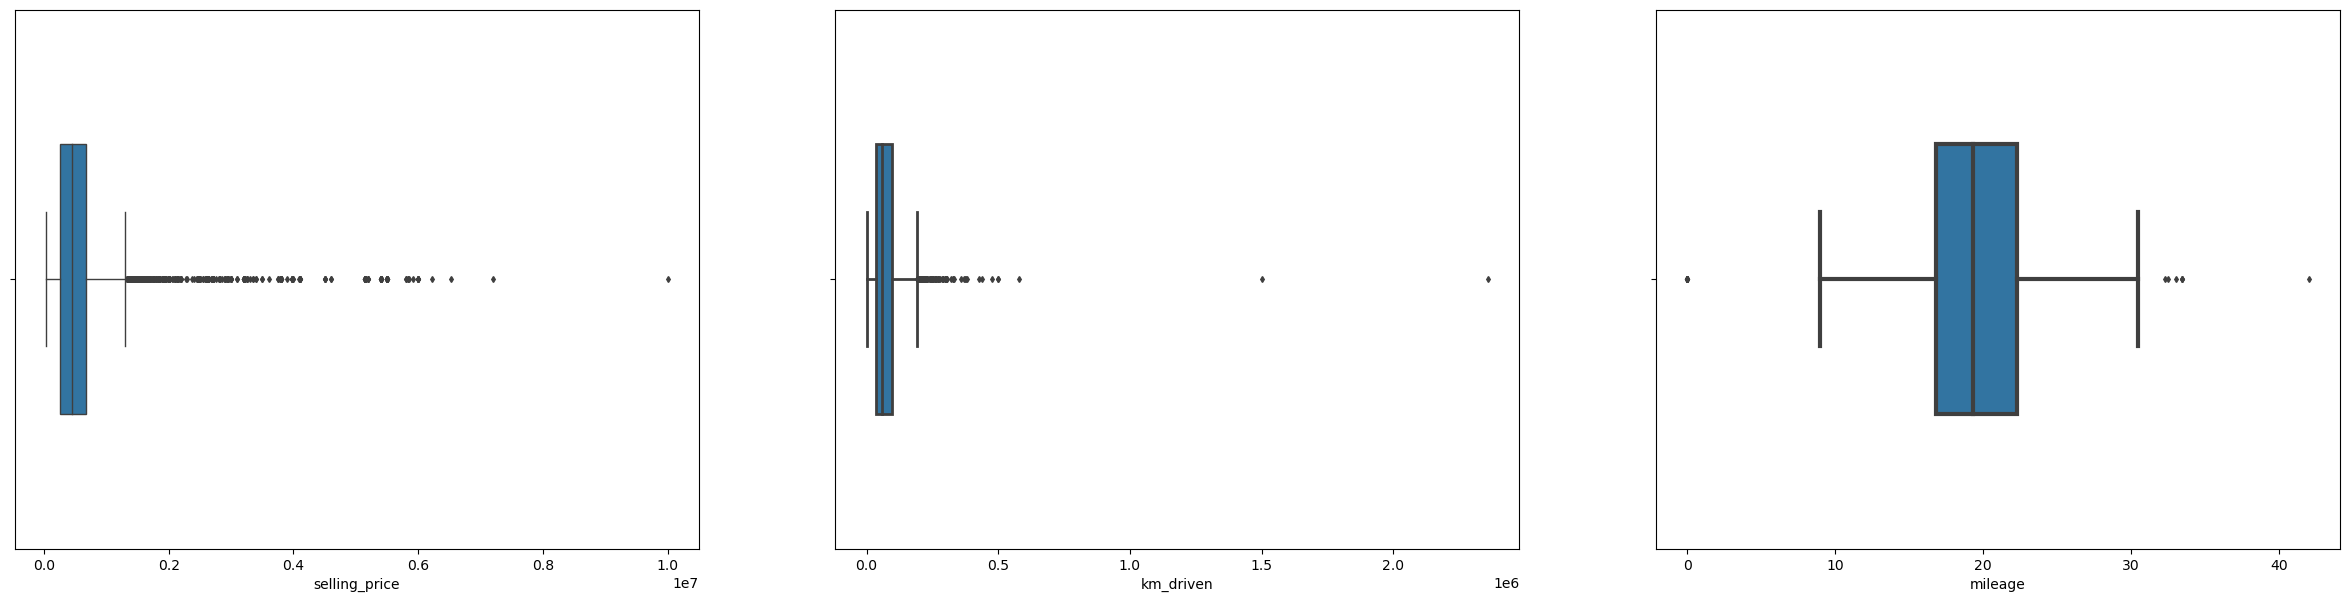

In [30]:
fig,axes = plt.subplots(1,3, figsize= (30,7))

sns.boxplot(ax=axes[0],x='selling_price',data=df,width=0.5,fliersize=3,linewidth=1);
sns.boxplot(ax=axes[1],x='km_driven',data=df,width=0.5,fliersize=3,linewidth=2);
sns.boxplot(ax=axes[2],x='mileage',data=df,width=0.5,fliersize=3,linewidth=3);


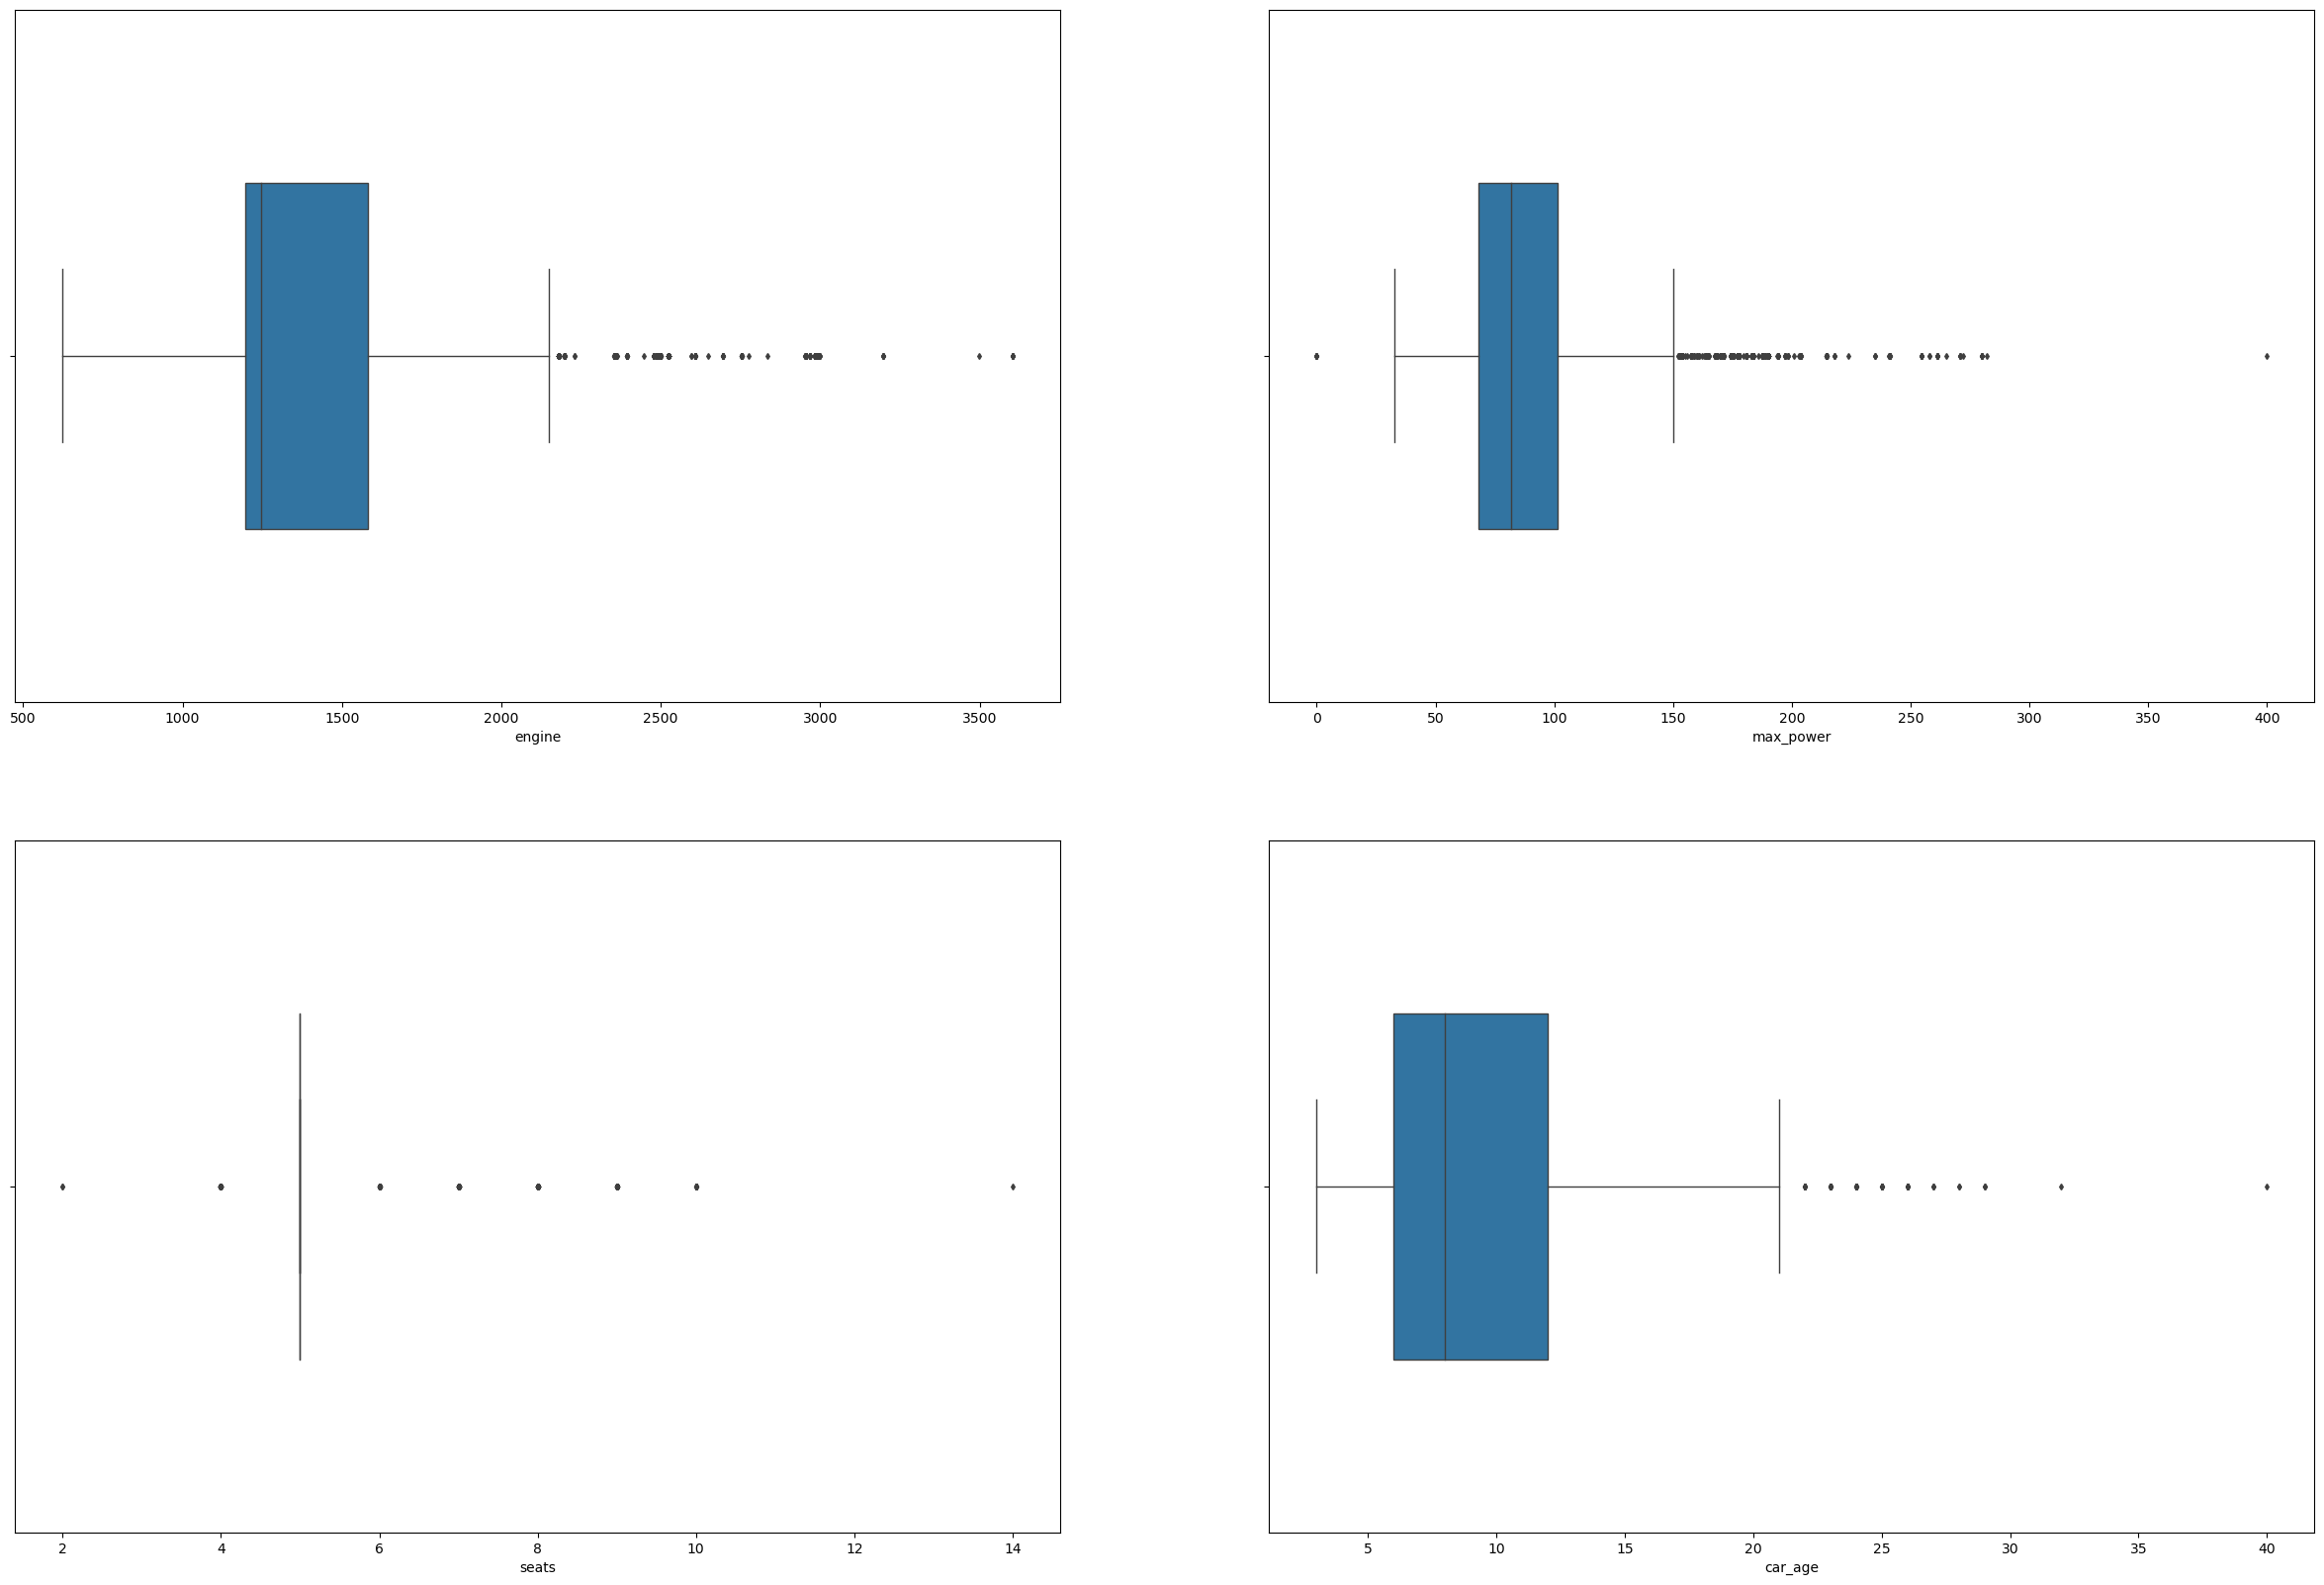

In [31]:
fig,axes = plt.subplots(2,2, figsize= (30,20))
axes=axes.flatten()

sns.boxplot(ax=axes[0],x='engine',data=df,width=0.5,fliersize=3,linewidth=1);
sns.boxplot(ax=axes[1],x='max_power',data=df,width=0.5,fliersize=3,linewidth=1);
sns.boxplot(ax=axes[2],x='seats',data=df,width=0.5,fliersize=3,linewidth=1);
sns.boxplot(ax=axes[3],x='car_age',data=df,width=0.5,fliersize=3,linewidth=1);

In [34]:
# Removing Outliers from selling_price

Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
iqr = Q3-Q1
li = Q1-(1.5*iqr)
ul = Q3+(1.5*iqr)
df = df[df['selling_price']>= li]
df = df[df['selling_price']<=ul]

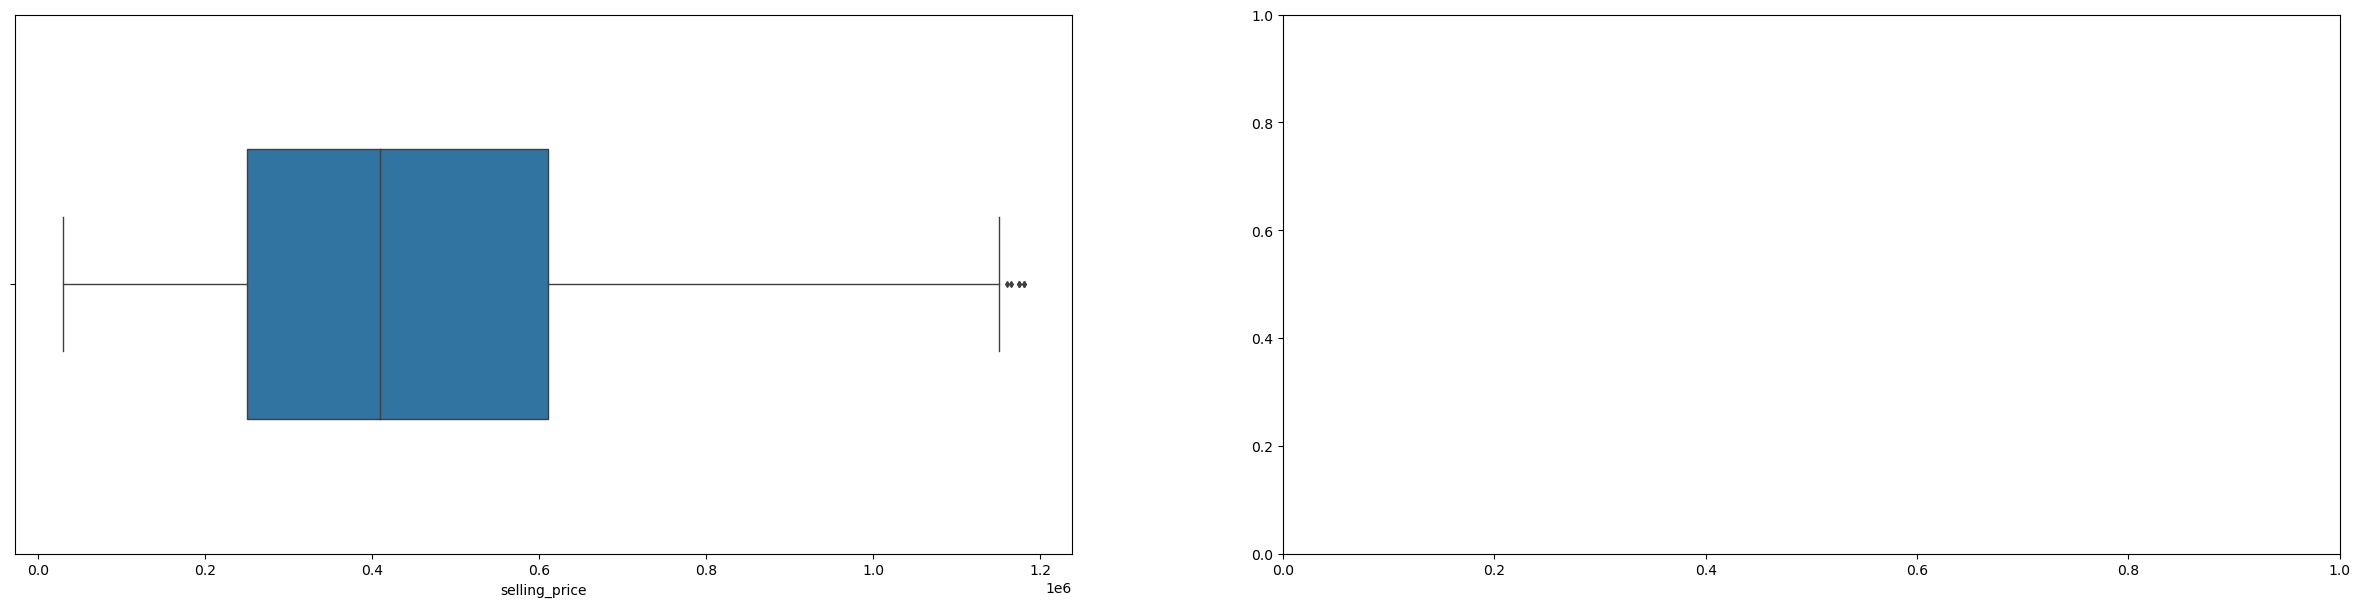

In [107]:
fig,axes = plt.subplots(1,2,figsize= (30,7))
sns.boxplot(ax=axes[0],x='selling_price',data=df,width=0.5,fliersize=3,linewidth=1);


In [36]:
# Removing Outliers from km_driven

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
iqr = Q3-Q1
li = Q1-(1.5*iqr)
ul = Q3+(1.5*iqr)
df = df[df['km_driven']>= li]
df = df[df['km_driven']<=ul]

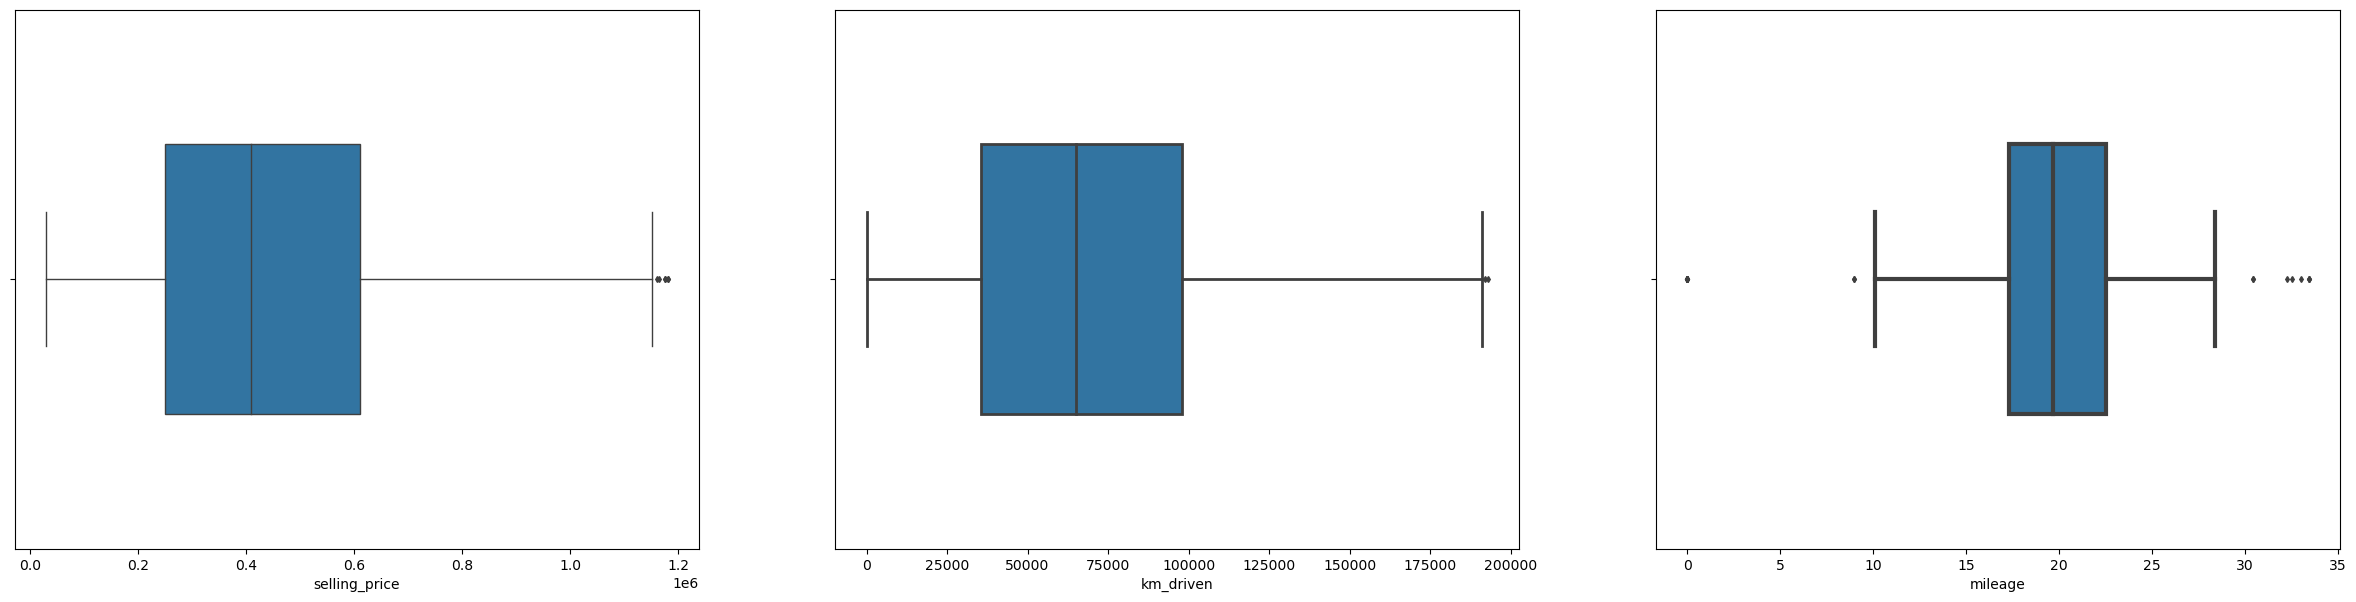

In [113]:
fig,axes = plt.subplots(1,3,figsize= (30,7))


sns.boxplot(ax=axes[0],x='selling_price',data=df,width=0.5,fliersize=3,linewidth=1);
sns.boxplot(ax=axes[1],x='km_driven',data=df,width=0.5,fliersize=3,linewidth=2);
sns.boxplot(ax=axes[2],x='mileage',data=df,width=0.5,fliersize=3,linewidth=3);


In [38]:
categoric_columns

['fuel', 'transmission', 'owner', 'seller_type']

#lets visualizes frequency of class
categoric_columns

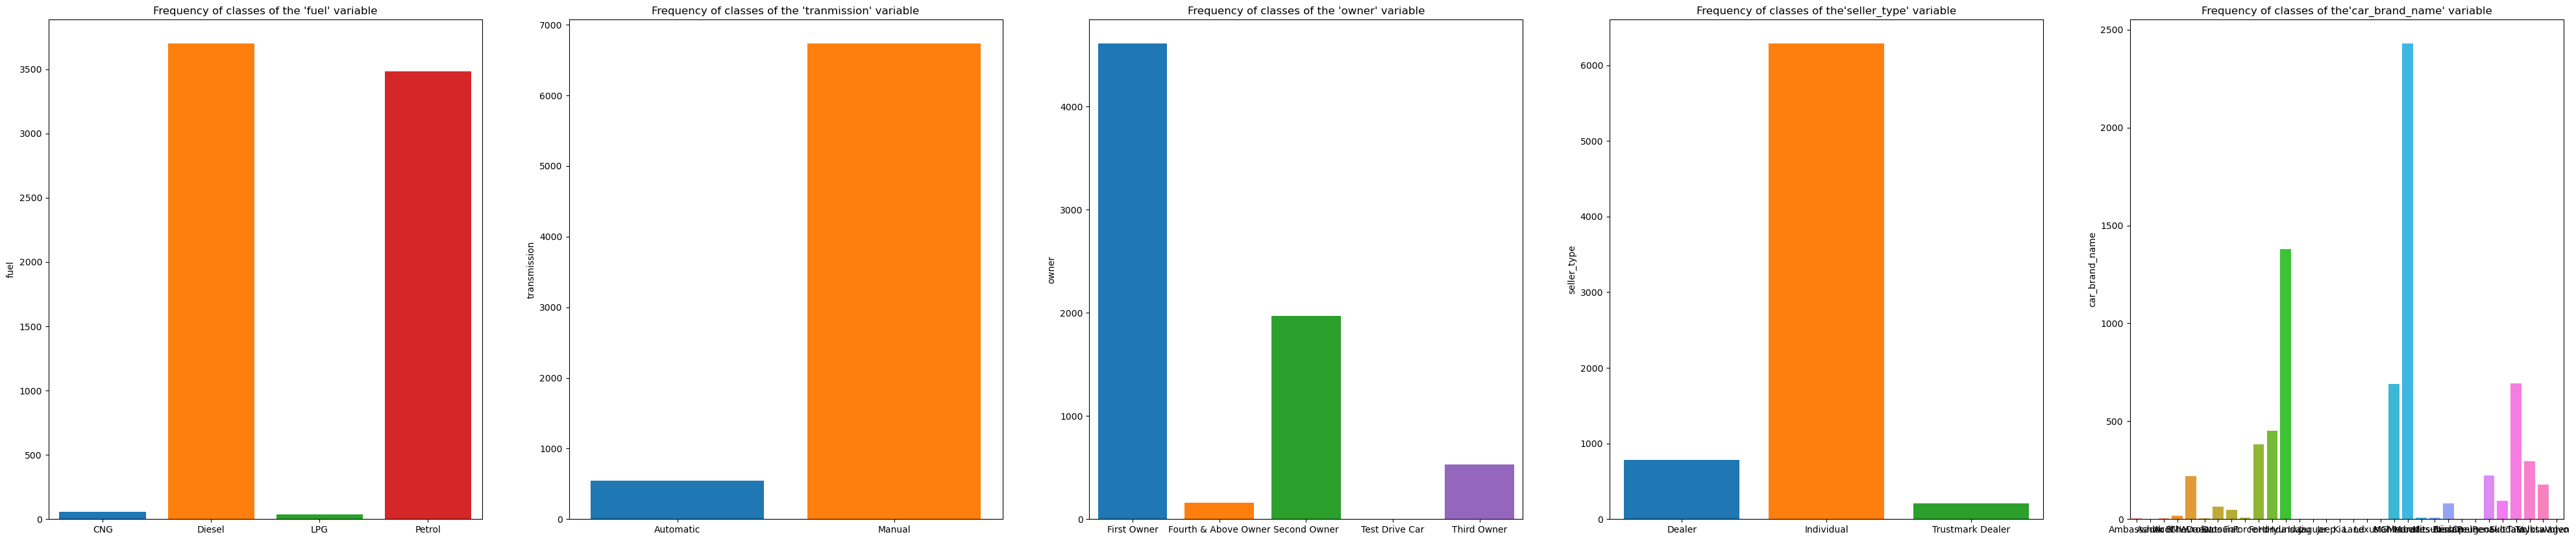

In [39]:
fig,axes=plt.subplots(1,5,figsize=(50,10))

sns.barplot(ax = axes[0], x = df["fuel"].value_counts().index, y = df["fuel"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'fuel' variable");

sns.barplot(ax = axes[1], x = df["transmission"].value_counts().index, y = df["transmission"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'tranmission' variable");

sns.barplot(ax = axes[2], x = df["owner"].value_counts().index, y = df["owner"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'owner' variable");

sns.barplot(ax = axes[3], x = df['seller_type'].value_counts().index, y = df['seller_type'].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the'seller_type' variable");

sns.barplot(ax = axes[4], x = df['car_brand_name'].value_counts().index, y = df['car_brand_name'].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the'car_brand_name' variable");


In [40]:
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0         450000     145500  Diesel  Individual       Manual   First Owner   
1         370000     120000  Diesel  Individual       Manual  Second Owner   
2         158000     140000  Petrol  Individual       Manual   Third Owner   
3         225000     127000  Diesel  Individual       Manual   First Owner   
4         130000     120000  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats car_brand_name  car_age  
0    23.40  1248.0      74.00    5.0         Maruti        9  
1    21.14  1498.0     103.52    5.0          Skoda        9  
2    17.70  1497.0      78.00    5.0          Honda       17  
3    23.00  1396.0      90.00    5.0        Hyundai       13  
4    16.10  1298.0      88.20    5.0         Maruti       16

In [41]:
# convert categorical variable into numerical variable
from sklearn.preprocessing import LabelEncoder

#initialize the label encoder
le=LabelEncoder()

# create a list of the categorical columns in your dataframe
cat_cols=['fuel','seller_type','transmission','owner']

#loop through each categorical column
for col in cat_cols:
    #fit the label encoder on the column
    le.fit(df[col])
    
    #transform the column into numerical values
    
    df[col]=le.transform(df[col])
    

In [42]:
df.head()

selling_price  km_driven  fuel  seller_type  transmission  owner  mileage  \
0         450000     145500     1            1             1      0    23.40   
1         370000     120000     1            1             1      2    21.14   
2         158000     140000     3            1             1      3    17.70   
3         225000     127000     1            1             1      0    23.00   
4         130000     120000     3            1             1      0    16.10   

   engine  max_power  seats car_brand_name  car_age  
0  1248.0      74.00    5.0         Maruti        9  
1  1498.0     103.52    5.0          Skoda        9  
2  1497.0      78.00    5.0          Honda       17  
3  1396.0      90.00    5.0        Hyundai       13  
4  1298.0      88.20    5.0         Maruti       16

In [43]:
#divided the data into dependent and independent variale
X=df.drop(columns=['selling_price','car_brand_name'])

In [44]:
y=df['selling_price']

In [45]:
X.shape,y.shape

((7277, 10), (7277,))

In [46]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)

(5821, 10)
(1456, 10)


# applying the features scaling part

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
X_train

array([[-0.21112139, -0.94328284,  0.22456114, ...,  0.20193513,
        -0.39626658, -0.848704  ],
       [ 0.17647948, -0.94328284,  0.22456114, ...,  0.25358328,
        -0.39626658,  0.63375841],
       [ 1.28926908, -0.94328284,  0.22456114, ..., -0.60044131,
        -0.39626658,  1.37498962],
       ...,
       [-0.96131662,  1.04112245,  0.22456114, ...,  0.00957626,
        -0.39626658, -1.09578107],
       [-0.46118647, -0.94328284,  0.22456114, ...,  0.00144269,
        -0.39626658, -0.60162693],
       [-0.46118647,  1.04112245,  0.22456114, ..., -0.6777102 ,
        -0.39626658,  0.13960427]])

In [50]:
X_test

array([[-0.83628408, -0.94328284,  0.22456114, ...,  1.01000506,
        -0.39626658, -0.848704  ],
       [ 1.51432765, -0.94328284,  0.22456114, ...,  1.00390489,
        -0.39626658, -0.1074728 ],
       [-0.21112139,  1.04112245,  0.22456114, ..., -0.43776995,
        -0.39626658, -0.60162693],
       ...,
       [ 0.78913892, -0.94328284,  0.22456114, ..., -0.88104938,
         1.78291886,  0.13960427],
       [-0.46118647,  1.04112245,  0.22456114, ...,  1.5264866 ,
        -0.39626658,  0.13960427],
       [ 0.03894369, -0.94328284,  0.22456114, ..., -0.64110914,
        -0.39626658,  0.88083548]])

In [51]:
#applying linear regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [52]:
#predicting the test set result
y_pred=regressor.predict(X_test)

In [53]:
# evaluation of linear regressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [54]:
#calculate the mse
mse=mean_squared_error(y_test,y_pred)

In [55]:
mse

16961345007.610762

In [56]:
#mae
mae=mean_absolute_error(y_test,y_pred)
print('mean_absolute_error',mae)

mean_absolute_error 102461.69605736891


In [57]:
# r2
r2=r2_score(y_test,y_pred)
print('R-squared',r2)

R-squared 0.7128165286439649


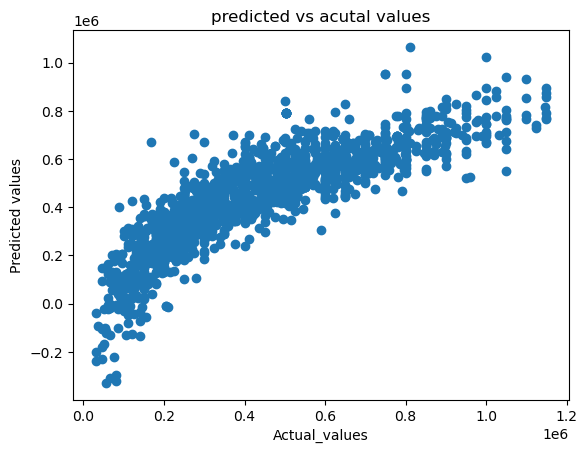

In [58]:
#plot the predicted vs actual values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual_values')
plt.ylabel('Predicted values')
plt.title('predicted vs acutal values')
plt.show()

In [59]:
# Applying Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
r2_score(y_test,y_pred_rf)

0.9052369065178345

In [60]:
#calculate the mse
mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error',mse)

#mae
mae=mean_absolute_error(y_test,y_pred)
print('mean_absolute_error',mae)


mean_squared_error 16961345007.610762
mean_absolute_error 102461.69605736891


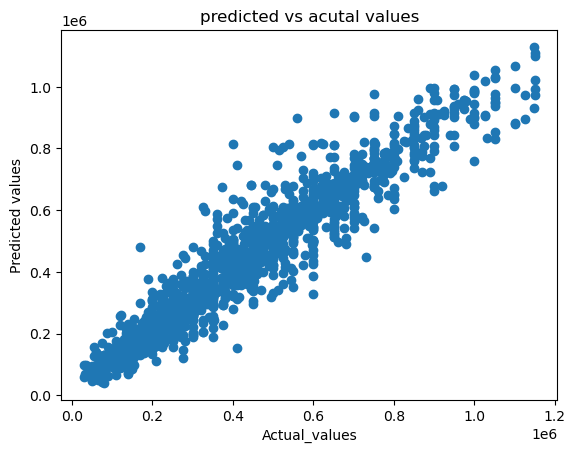

In [61]:
#plot the predicted vs actual values
plt.scatter(y_test,y_pred_rf)
plt.xlabel('Actual_values')
plt.ylabel('Predicted values')
plt.title('predicted vs acutal values')
plt.show()

In [62]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train,y_train)
y_pred_knr = regressor.predict(X_test)
r2_KNR = r2_score(y_test,y_pred_knr)
print(r2_KNR)

0.832453642514552


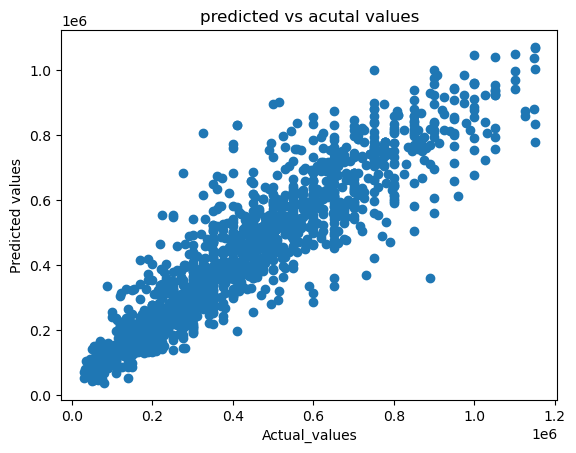

In [63]:
#plot the predicted vs actual values
plt.scatter(y_test,y_pred_knr)
plt.xlabel('Actual_values')
plt.ylabel('Predicted values')
plt.title('predicted vs acutal values')
plt.show()

In [64]:
# decision tree 
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)

regressor.fit(X_train,y_train)

y_pred_dt=regressor.predict(X_test)


r2_score(y_test,y_pred_dt)


0.8454490583036938

In [65]:
#calculate the mse
mse=mean_squared_error(y_test,y_pred_dt,squared=False)
print('mean_squared_error',mse)

#mae
mae=mean_absolute_error(y_test,y_pred_dt)
print('mean_absolute_error',mae)


mean_squared_error 95540.22318896285
mean_absolute_error 62087.86721611721


In [66]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred_dt))

9127934246.996834


In [67]:
# Combine all Evaluation matrix in one df
models = [ LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor]
mse = []
rmse = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))


In [68]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'KNeighbors Regressor', 'Decision Tree Regressor', 'Random Forest Regressor'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

Mean Squared Error  Root Mean Squared Error  \
Models                                                                 
Linear Regression              1.696135e+10            130235.728614   
KNeighbors Regressor           9.895457e+09             99475.909595   
Decision Tree Regressor        8.846004e+09             94053.196418   
Random Forest Regressor        5.583430e+09             74722.349432   

                         R-Square Score / Accuracy  
Models                                              
Linear Regression                         0.712817  
KNeighbors Regressor                      0.832454  
Decision Tree Regressor                   0.850223  
Random Forest Regressor                   0.905463

In [69]:
# Cross Validation for Linear Regression

from sklearn.model_selection import cross_val_score

Liner_Regression_Score = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')
print(Liner_Regression_Score)
print("Mean Score:", Liner_Regression_Score.mean()*100,'%')

[0.71359704 0.71044163 0.70164264 0.68593769 0.71076051]
Mean Score: 70.44759019885502 %


In [108]:
# Cross Validation for KNN

knn_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
print(knn_score)
print("Mean Score:", knn_score.mean()*100,'%')

[0.8908856  0.89010588 0.8879788  0.90002015 0.89384245]
Mean Score: 89.2566576422497 %


In [71]:
# Cross Validation for Decision Tree

dt_score = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=5, scoring='r2')
print(dt_score)
print("Mean Score:", dt_score.mean()*100,'%')

[0.82286546 0.81107897 0.81677468 0.82778863 0.81318206]
Mean Score: 81.8337960744893 %


In [72]:
# Cross Validation for Random Forest Algo

rm_score = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5, scoring='r2')
print(rm_score)
print("Mean Score:", rm_score.mean()*100,'%')

[0.89269705 0.88764636 0.88784922 0.89961423 0.8931202 ]
Mean Score: 89.21854100092494 %


Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

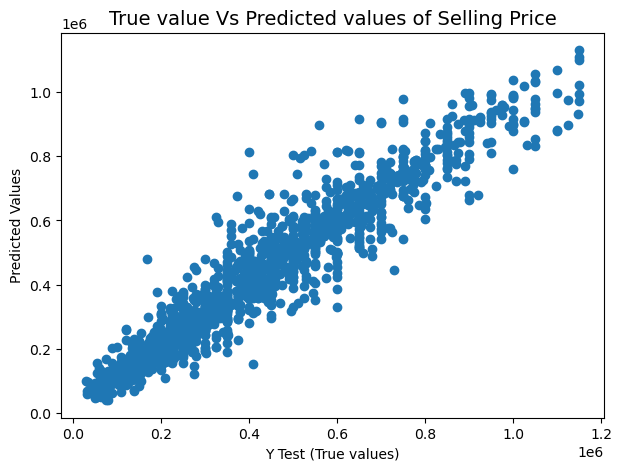

In [73]:
# Predicting Test Data by visualizing of RF

plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_pred_rf)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

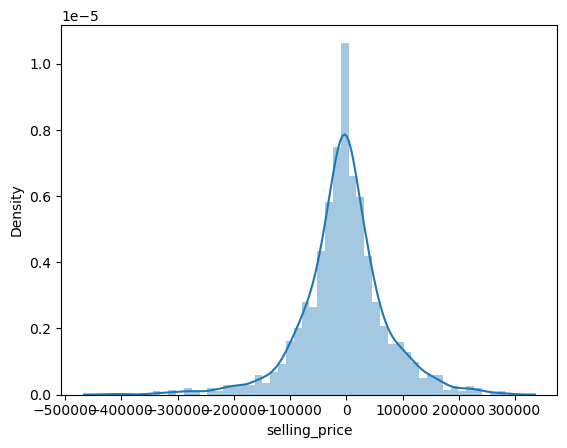

In [74]:
# explore the residuals of RF

sns.distplot(y_test - y_pred_rf)

In [75]:
# Model Evaluation of RF

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_pred_rf))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error:  51685.309263043506
Mean Squareed Error:  5596803726.029278
Root Mean Square Error:  74811.78868353087


In [76]:
print('Accuracy: ', r2_score(y_test, y_pred_rf))


Accuracy:  0.9052369065178345


In [77]:
test_df = pd.DataFrame({"Actual Values": y_test, "Predicted Value": y_pred_rf})

test_df.set_index('Actual Values', inplace=True)
test_df.head(20)

Predicted Value
Actual Values                 
850000           778400.000000
650000           514150.000000
330000           367359.990000
795000           726449.990000
600000           618250.000000
329000           340170.000000
540000           653373.323333
250000           190549.940000
400000           383209.990000
300000           311879.920000
475000           477020.000000
570000           551838.656667
448000           459983.990000
560000           897987.380000
455000           416498.571429
160000           175591.500000
140000           171929.890000
170000           154949.995000
340000           365200.000000
370000           455875.713333

In [78]:
import pickle
f_name = 'savemodel.sav'
pickle.dump(rf,open(f_name, 'wb'))

In [79]:
load_model = pickle.load(open(f_name,'rb'))

In [80]:
X_test[0]

array([-0.83628408, -0.94328284,  0.22456114, -3.52312963,  1.144049  ,
        0.50335131,  0.28838851,  1.01000506, -0.39626658, -0.848704  ])

In [81]:
rf.predict([[-0.83628408, -0.94328284,  0.22456114, -3.52312963,  1.144049  ,
        0.50335131,  0.28838851,  1.01000506, -0.39626658, -0.848704  ]])

array([778400.])

In [82]:
X_test[1]

array([ 1.51432765, -0.94328284,  0.22456114,  0.28383855, -0.72554932,
       -0.01227049,  0.20323161,  1.00390489, -0.39626658, -0.1074728 ])

In [83]:
rf.predict([[ 1.51432765, -0.94328284,  0.22456114,  0.28383855, -0.72554932,
       -0.01227049,  0.20323161,  1.00390489, -0.39626658, -0.1074728 ]])

array([514150.])